In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv('/Users/mehrac/Desktop/DSA-Python/loan_prediction.csv')

In [3]:
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Hypothesis. In my opinion, here are the most important factors for predicting the loan approval: 
<br> <br> Applicant Income
<br> Credit History
<br> Loan Amount

Understanding the Data


In [4]:
train_data.shape

(614, 13)

In [5]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Lets fix name of some columns


In [3]:
train_data.rename(columns={
    'ApplicantIncome' : 'Applicant_Income',
    'CoapplicantIncome' : 'Coapplicant_Income',
    'LoanAmount' : 'Loan_Amount'
}, inplace=True)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             614 non-null    object 
 1   Gender              601 non-null    object 
 2   Married             611 non-null    object 
 3   Dependents          599 non-null    object 
 4   Education           614 non-null    object 
 5   Self_Employed       582 non-null    object 
 6   Applicant_Income    614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         592 non-null    float64
 9   Loan_Amount_Term    600 non-null    float64
 10  Credit_History      564 non-null    float64
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Understanding target varibale

In [8]:
train_data['Loan_Status'].value_counts(normalize=True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

<Axes: xlabel='Loan_Status'>

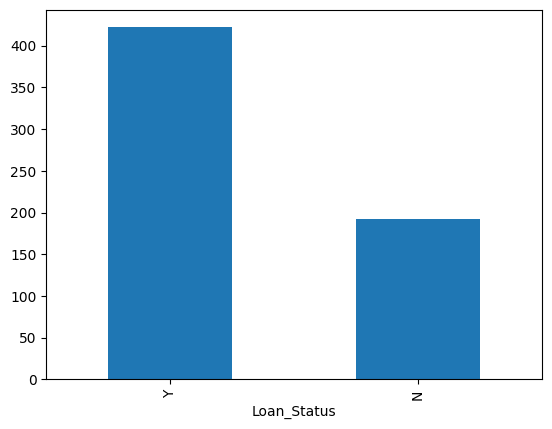

In [9]:
train_data['Loan_Status'].value_counts().plot.bar()

Understanding independent variables. In this dataset we have: <br>
<br> 1. Categoric variables(Gender, married, self-employed, credit history)
<br> 2. Ordinal variables (number of dependants, education, property area)
<br> 3. Numeric variables (income, loan amount, loan duration)

<Axes: title={'center': 'Education'}, xlabel='Education'>

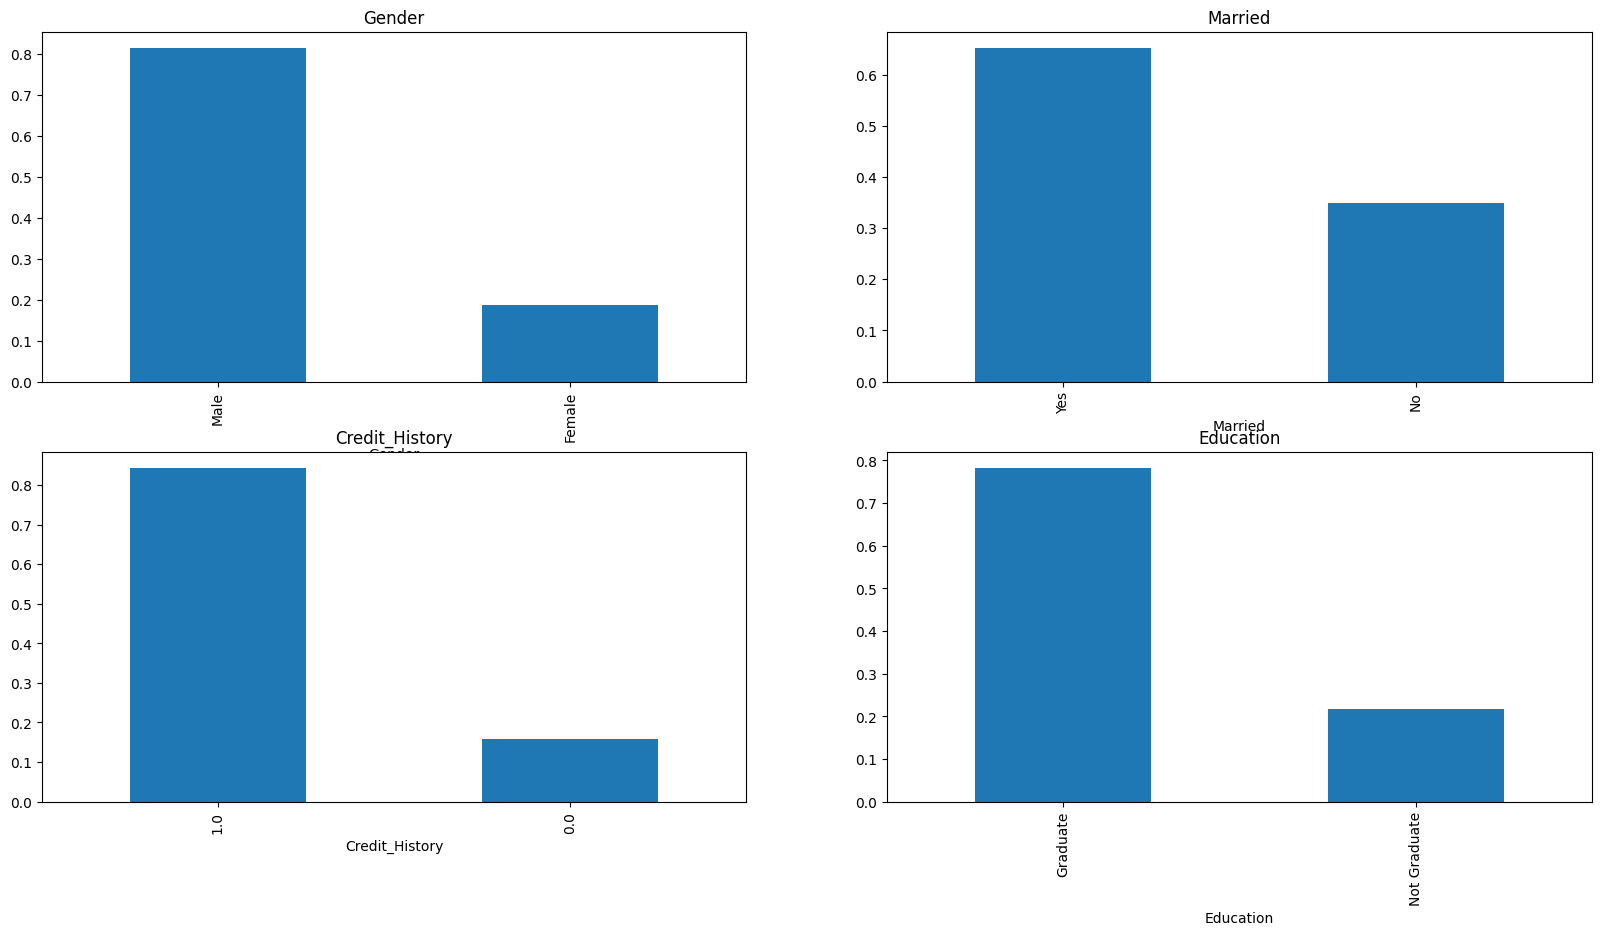

In [10]:
plt.figure(1) 

plt.subplot(221) 
train_data["Gender"].value_counts(normalize=True).plot.bar(figsize= (20,10), title = "Gender")

plt.subplot(222)
train_data["Married"].value_counts(normalize=True).plot.bar(title = "Married")

plt.subplot(223)
train_data["Credit_History"].value_counts(normalize=True).plot.bar( title = "Credit_History")

plt.subplot(224)
train_data["Education"].value_counts(normalize=True).plot.bar(title = "Education")

<Axes: title={'center': 'Property_Area'}, xlabel='Property_Area'>

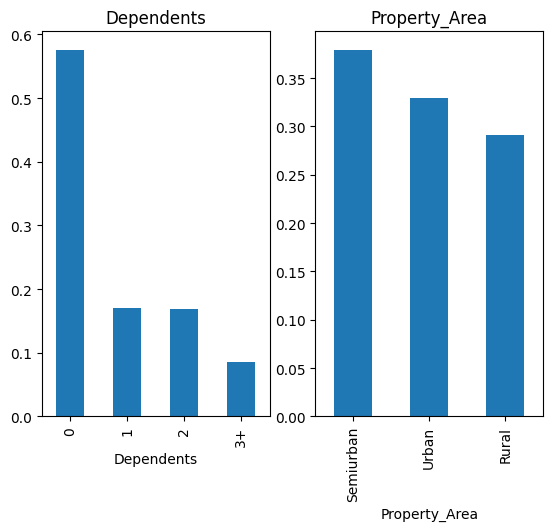

In [11]:
plt.figure(1) 

plt.subplot(131) 
train_data["Dependents"].value_counts(normalize=True).plot.bar(figsize= (10,5), title = "Dependents")

plt.subplot(132)
train_data["Property_Area"].value_counts(normalize=True).plot.bar(title = "Property_Area")



<Axes: >

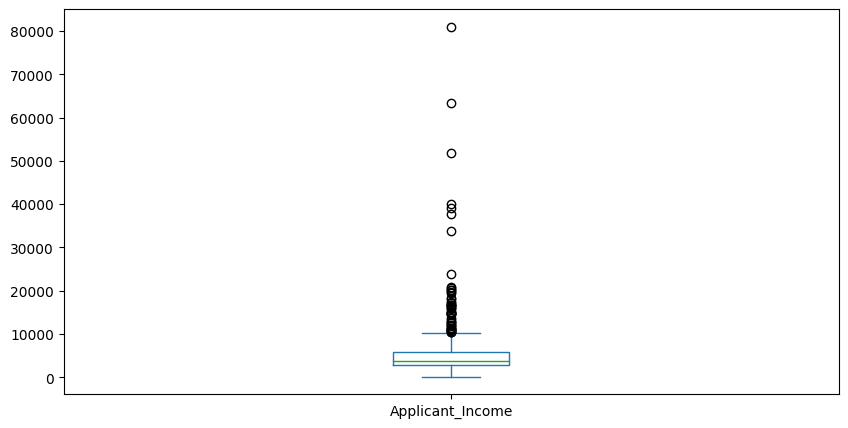

In [12]:
train_data["Applicant_Income"].plot.box(figsize = (10,5))


<Axes: xlabel='Applicant_Income', ylabel='Density'>

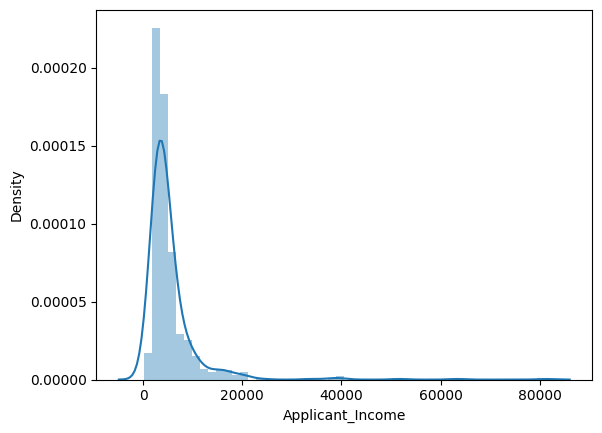

In [13]:
sns.distplot(train_data["Applicant_Income"])

We can see that salary is not normally distributed with majority of point on the lest side. We also see that there are lots of outliers via box plot. 

<Axes: >

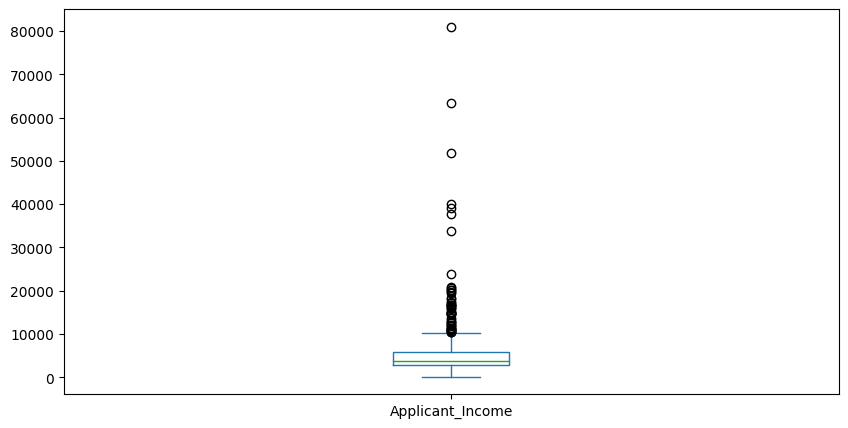

In [14]:
train_data["Applicant_Income"].plot.box(figsize = (10,5))

<Axes: >

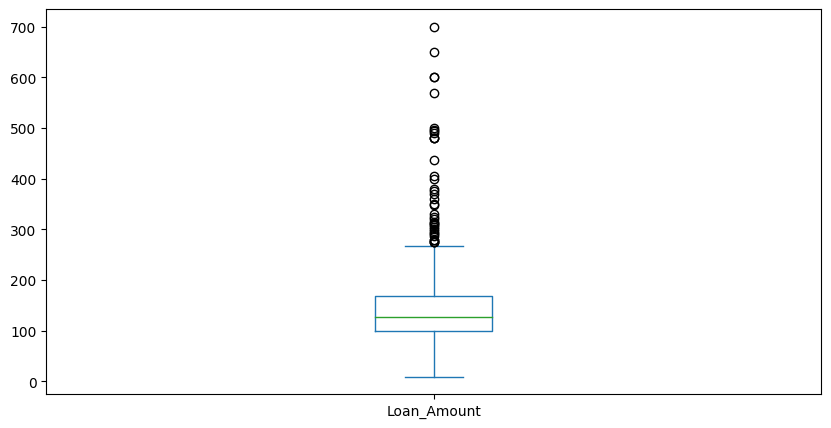

In [15]:
train_data["Loan_Amount"].plot.box(figsize = (10,5))

<Axes: xlabel='Loan_Amount', ylabel='Density'>

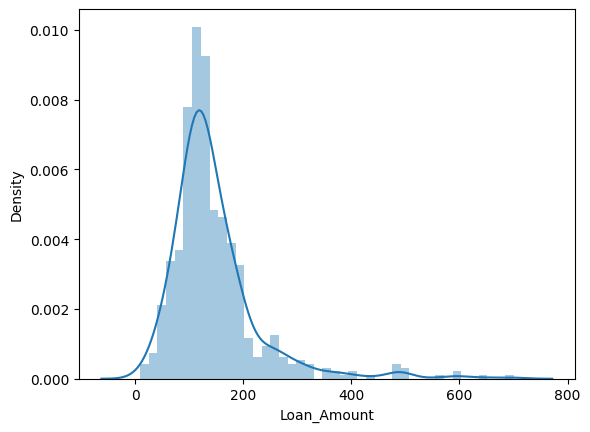

In [16]:
sns.distplot(train_data["Loan_Amount"])

Same is observed with loan amount


Lets inspect correlations between other variables

Lets change dependands and target variables values in order to find correlations

In [4]:
train_data["Dependents"].replace("3+", 3, inplace=True)
train_data["Loan_Status"].replace("N", 0, inplace=True)
train_data["Loan_Status"].replace("Y", 1, inplace=True)

train_numeric = train_data.drop(["Gender", "Loan_ID", "Education", "Property_Area", "Married", "Self_Employed", "Dependents"], axis=1)

In [18]:
train_numeric

,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,NaN,360.0,1.0,1
1,4583,1508.0,128.0,360.0,1.0,0
2,3000,0.0,66.0,360.0,1.0,1
3,2583,2358.0,120.0,360.0,1.0,1
4,6000,0.0,141.0,360.0,1.0,1
...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1
610,4106,0.0,40.0,180.0,1.0,1
611,8072,240.0,253.0,360.0,1.0,1
612,7583,0.0,187.0,360.0,1.0,1


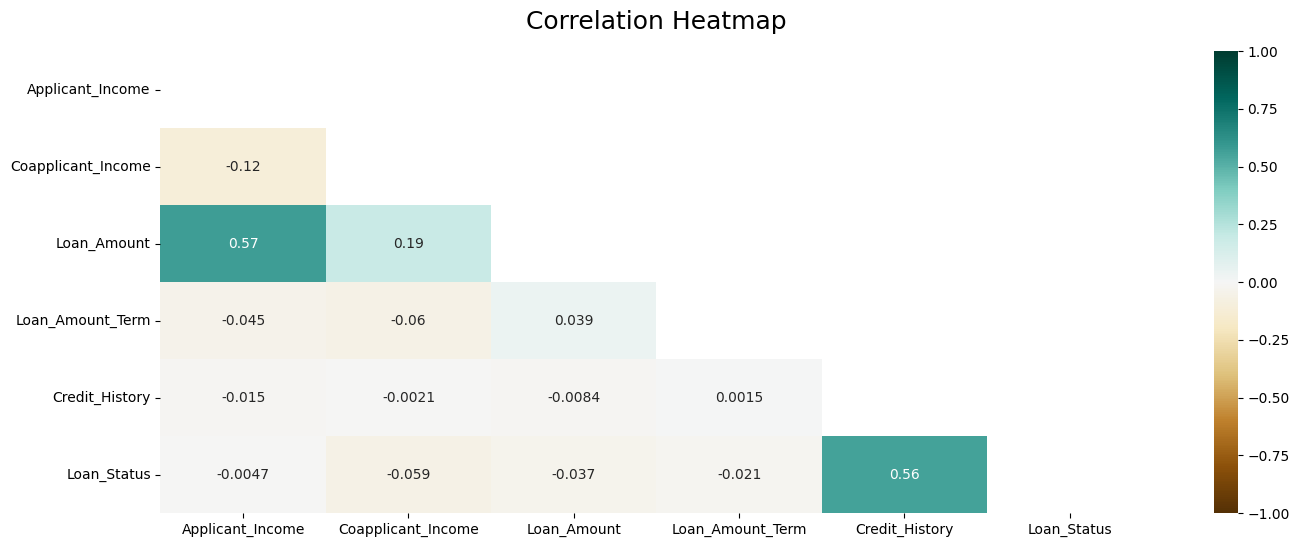

In [19]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(train_numeric.corr(), dtype=bool))
heatmap = sns.heatmap(train_numeric.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

Lets look for missing values

In [5]:
train_data.isnull().sum()

Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount           22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
dtype: int64

Lets use mode to fill the categorical varianles

In [21]:
train_data['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [5]:
train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace=True)


In [7]:
train_data.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount           22
Loan_Amount_Term      14
Credit_History         0
Property_Area          0
Loan_Status            0
dtype: int64

In [24]:
train_data['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

<Axes: >

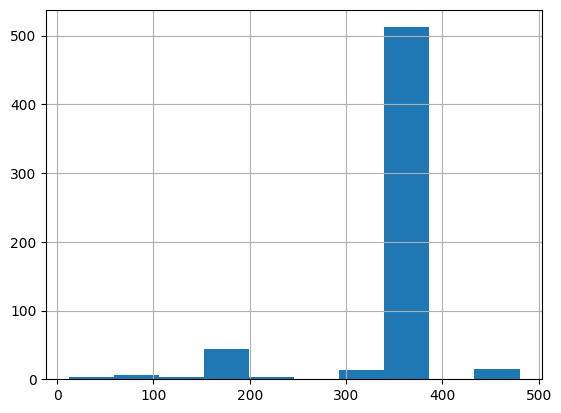

In [25]:
train_data['Loan_Amount_Term'].hist()

360 is the most popular loan term, so lets fill NaN values with this value (mode)

In [6]:
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)

In [27]:
train_data.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount           22
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
dtype: int64

<Axes: >

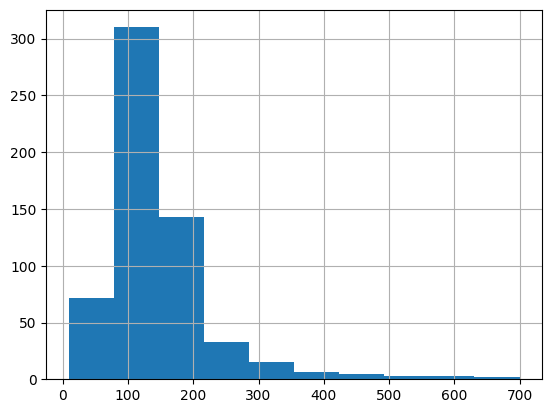

In [28]:
train_data['Loan_Amount'].hist()

Loan amount is a numeric variable, so we need to use mean or median. Since we earlier discovered that loan amount has lots of outliers, lets use median to fill the NaN instead of mean, bcs its affected by outliers

In [7]:
train_data['Loan_Amount'].fillna(train_data['Loan_Amount'].median(), inplace=True)

In [10]:
train_data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Now lets deal with outliers. Lets make an assumption that the outliers are not wrongfully inputed and they provide valubale information, hence we will include them into our model.

In [31]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Coapplicant_Income',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [32]:
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


Since we not gonna need LOAN iD column for the model, lets  drop it

In [8]:
train_data.drop('Loan_ID', axis=1, inplace=True)

Lets define our features and target variable


In [9]:
X = train_data.drop('Loan_Status', axis=1)
y = train_data['Loan_Status']


Since we have categorical features, lets use encode them to dummy variables

In [10]:
X = pd.get_dummies(X, dtype=int)
X

,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1


Now lets devide our data into train and test

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify= y)

Now as our data looks ready, lets do the Voting classifier. Lets import Logistic, decision tree and SVC classifiers.


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
svm = SVC(probability=True)

In [17]:
model_lr = LogisticRegression(random_state=42)
model_dt = DecisionTreeClassifier(random_state=42)
model_sv = SVC(random_state=42)

In [18]:
model_lr.fit(X_train, y_train)
model_dt.fit(X_train, y_train)
model_sv.fit(X_train, y_train)

SVC(random_state=42)

In [19]:
model_lr_pred = model_lr.predict(X_test)
model_dt_pred = model_dt.predict(X_test)
model_sv_pred = model_sv.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score

print(model_lr.__class__.__name__ , accuracy_score(y_test, model_lr_pred))
print(model_dt.__class__.__name__ , accuracy_score(y_test, model_dt_pred))
print(model_sv.__class__.__name__ , accuracy_score(y_test, model_sv_pred))

LogisticRegression 0.7621621621621621
DecisionTreeClassifier 0.745945945945946
SVC 0.6864864864864865


Hard Class


In [21]:
from sklearn.ensemble import VotingClassifier
estimators = [('lr', model_lr), ('dt', model_dt) , ('svm', model_sv)] 
voting_hard = VotingClassifier(estimators, voting="hard")

In [22]:
voting_hard.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('svm', SVC(random_state=42))])

In [23]:
voting_hard_pred = voting_hard.predict(X_test)

In [25]:
accuracy_score(voting_hard_pred, y_test)

0.7837837837837838

Soft Class

In [29]:
model4 = SVC(probability=True) 
estimators = [('lr', model_lr), ('dt', model_dt) , ('svm', model4) ] 
voting_soft = VotingClassifier(estimators, voting="soft")

In [30]:
voting_soft.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('svm', SVC(probability=True))],
                 voting='soft')

In [31]:
voting_soft_pred = voting_soft.predict(X_test)

In [32]:
accuracy_score(y_test, voting_soft_pred)

0.7567567567567568

Bagging Classifier

In [57]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(base_estimator= svm,
                 n_estimators = 20,
                 max_samples = 0.3,
                 max_features = 5,
                 bootstrap = True,
                 bootstrap_features = True,
                 n_jobs = -1,
                 random_state = 42)

bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=SVC(probability=True), bootstrap_features=True,
                  max_features=5, max_samples=0.3, n_estimators=20, n_jobs=-1,
                  random_state=42)

In [58]:
bag_pred = bag.predict(X_test)
accuracy_score(y_test, bag_pred)

0.6864864864864865

Gradient Boosting class

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(random_state = 42)

gbm.fit(X_train, y_train)
gbm_pred = gbm.predict(X_test)
accuracy_score(y_test, gbm_pred)

0.7891891891891892

XGBoost Classifier

In [47]:
from xgboost import XGBClassifier

In [48]:
xgbt = XGBClassifier(max_depth = 2,
             learning_rate = 0.2,
             objective  = "multi:softmax",
             num_class = 2,
             booster = "gbtree",
             n_estimarors = 10,
             random_state = 123)

xgbt.fit(X_train, y_train)
xgbt_pred = xgbt.predict(X_test)
accuracy_score(y_test, xgbt_pred)

[20:40:20] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "n_estimarors" } are not used.



0.7837837837837838

CatBoost Classifier

In [56]:
from catboost import CatBoostRegressor


model_cat = CatBoostRegressor(iterations=10,
                          learning_rate=1,
                          depth=10)

model_cat.fit(X_train, y_train)

preds = model_cat.predict(X_test)

model_cat.score(X_train, y_train)

0:	learn: 0.3699071	total: 17.7ms	remaining: 160ms
1:	learn: 0.3412525	total: 19.3ms	remaining: 77.1ms
2:	learn: 0.3116317	total: 35.5ms	remaining: 82.8ms
3:	learn: 0.2823943	total: 51.6ms	remaining: 77.3ms
4:	learn: 0.2627404	total: 67.7ms	remaining: 67.7ms
5:	learn: 0.2489735	total: 84.2ms	remaining: 56.1ms
6:	learn: 0.2099484	total: 100ms	remaining: 43ms
7:	learn: 0.1921326	total: 116ms	remaining: 29.1ms
8:	learn: 0.1808609	total: 133ms	remaining: 14.7ms
9:	learn: 0.1613446	total: 149ms	remaining: 0us


0.8788016430960747